## Домашняя работа #1.

Домашнее задание сдаётся в виде ссылки (с доступом комментатор или редактор) на Colab в опросе:
	https://forms.gle/LJEMdpXAGUvTu8vP8

## Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

* Soft deadline: **27.01.2022 03:00:00 +0003 GMT** 
* Hard deadline: **03.02.2022 03:00:00 +0003 GMT**


In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# matpltolib settings
plt.style.use('dark_background')  # dark theme
plt.rc('figure', dpi=150)         # larger images

##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами: 
* c помощью функций split & merge
* с помощью индексации в numpy 
* с помощью cvtColor

Text(0.5, 1.0, 'Array shape: 1024$\\times$1024$\\times$3')

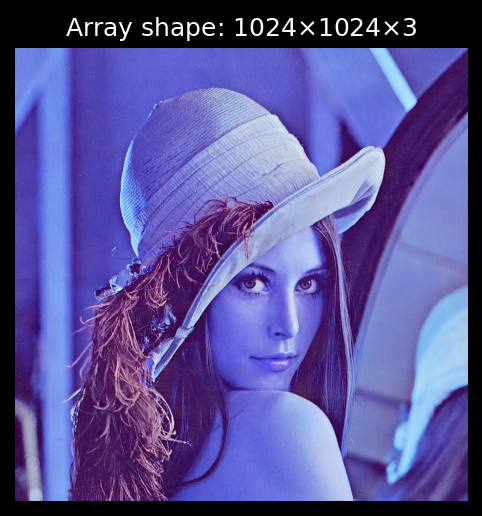

In [3]:
img = cv.imread('lena.png')
plt.imshow(img)  # изображение в BGR
plt.axis('off')
plt.title('Array shape: ' + r'$\times$'.join(map(str, img.shape)))

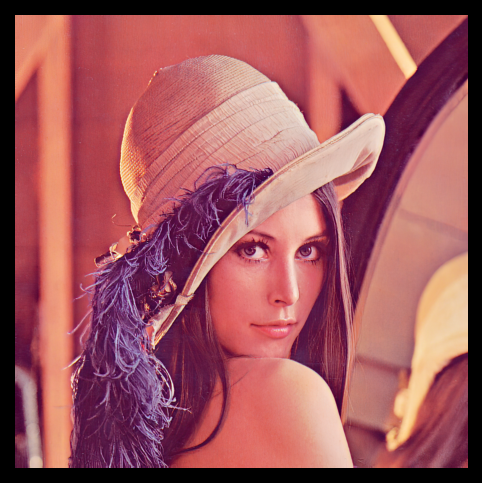

In [4]:
# first method
b, g, r = cv.split(img)
img_rgb = cv.merge((r, g, b))
plt.imshow(img_rgb)
plt.axis('off');

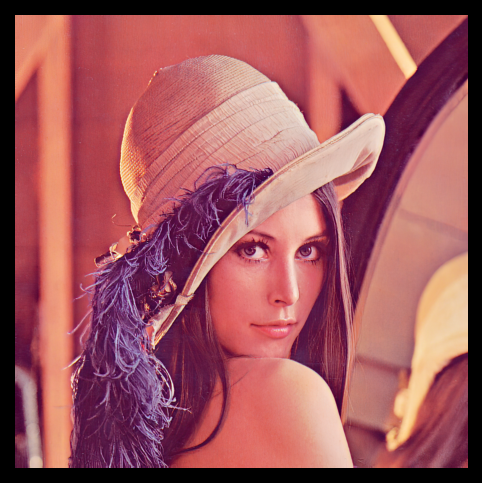

In [5]:
# second method
plt.imshow(img[:, :, ::-1])
plt.axis('off');

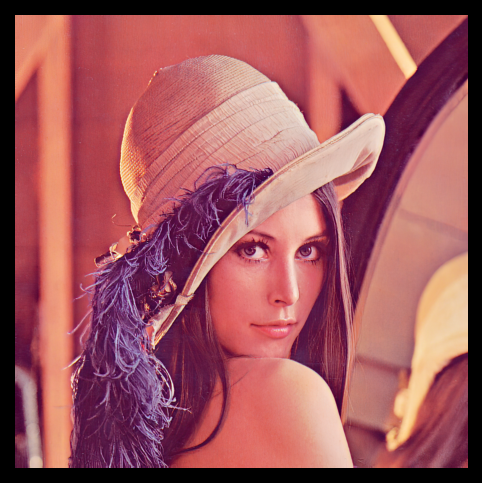

In [6]:
# third method
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off');

##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

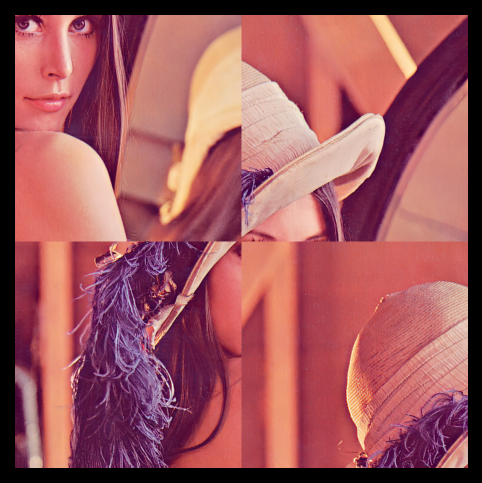

In [7]:
y_mid, x_mid = img.shape[0] // 2, img.shape[1] // 2
img_new = img_rgb.copy()
img_new[:y_mid, :x_mid] = img_rgb[y_mid:, x_mid:]
img_new[y_mid:, x_mid:] = img_rgb[:y_mid, :x_mid]
plt.imshow(img_new)
plt.axis('off');

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране. 

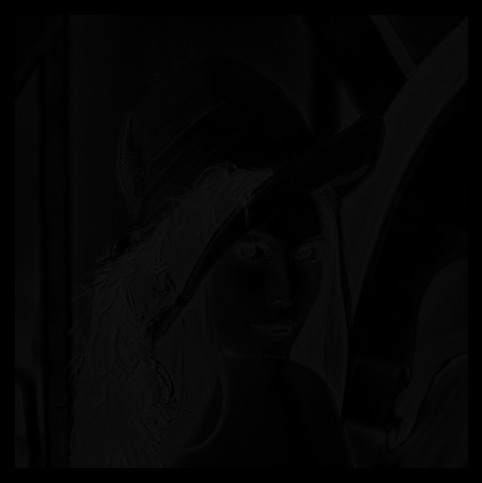

In [8]:
lena_gray_my = np.zeros_like(img)
lena_gray_my[:, :, 0] = np.round(np.mean(img, axis=2))
lena_gray_my[:, :, 1] = lena_gray_my[:, :, 2] = lena_gray_my[:, :, 0]  # useless copies
lena_gray_cvt = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
diff = np.abs(lena_gray_my.astype(np.int16)
              - lena_gray_cvt[:, :, np.newaxis]).astype(np.uint8)
plt.imshow(cv.cvtColor(diff, cv.COLOR_BGR2RGB))
plt.axis('off');

##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

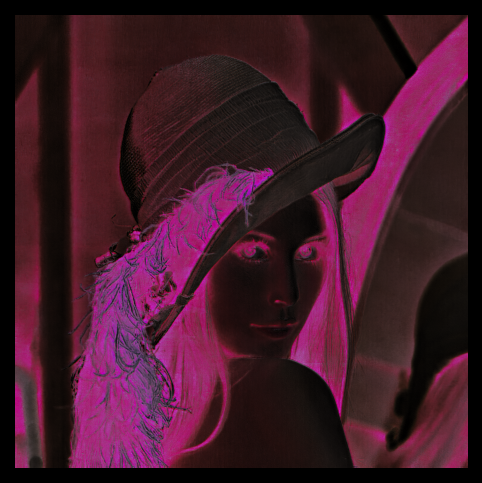

In [9]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_hsv[:, :, 2] = 255 - img_hsv[:, :, 2]
plt.imshow(cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB))
plt.axis('off');

##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

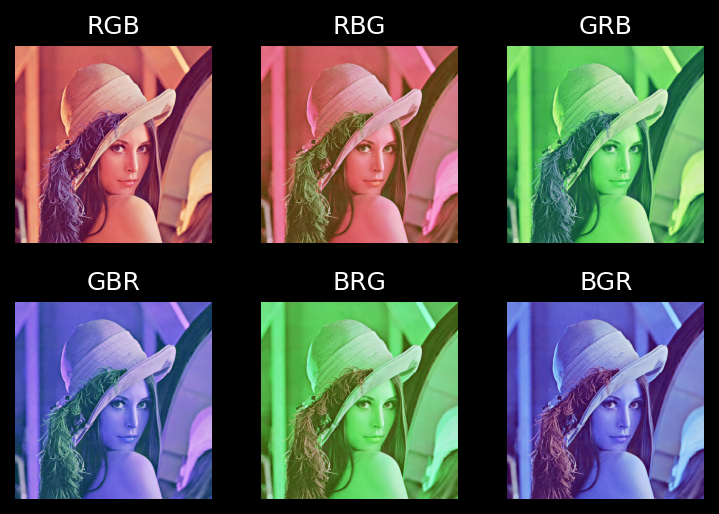

In [10]:
from itertools import permutations

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.3)
axes = axes.flatten()[::-1]
colors = 'BGR'

for i, inds in enumerate(permutations([0, 1, 2])):
    ax = axes[i]
    ax.imshow(img[:, :, np.array(inds)])
    ax.set_title(''.join(colors[i] for i in inds))
    ax.set_axis_off()

#### Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

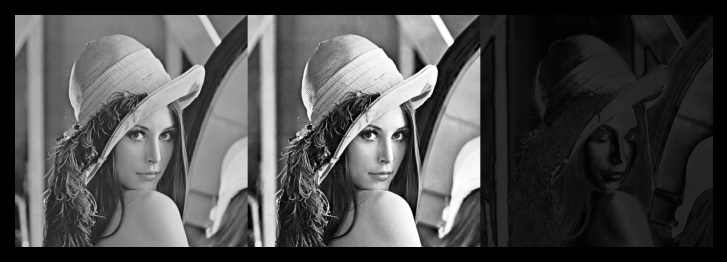

In [11]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_lin = cv.normalize(img_gray, None, 0, 255, cv.NORM_MINMAX)
img_eq = cv.equalizeHist(img_gray, None)
plt.imshow(np.hstack(
    [img_lin, img_eq,
     np.abs(img_lin.astype('int16') - img_eq).astype('uint8')]
    ), cmap='gray')
plt.axis('off');

#### Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

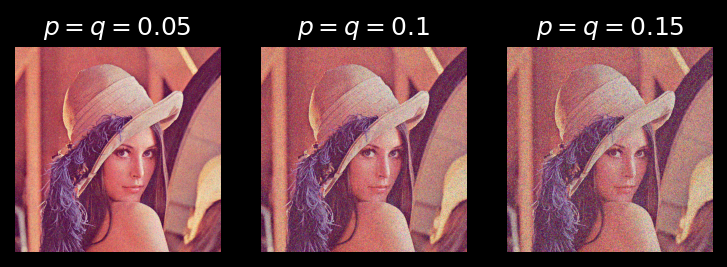

In [12]:
def salt_pepper(src, p, q):
    assert isinstance(src, np.ndarray) and src.ndim == 2
    dst = src.copy()
    ix = np.random.random(src.shape)
    dst[ix < p] = 0
    dst[ix > 1 - q] = 255
    return dst


b, g, r = cv.split(img)
fig, axes = plt.subplots(ncols=3)
for p, ax in zip((0.05, 0.1, 0.15), axes):
    b_new = salt_pepper(b, p, p)
    g_new = salt_pepper(g, p, p)
    r_new = salt_pepper(r, p, p)
    ax.imshow(cv.merge((r_new, g_new, b_new)))
    ax.set_axis_off()
    ax.set_title(f'$p = q = ${p}')


#### Задача 8 (3 балла)
Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Визуализируйте изображение, представляющее собой разность полученных результатов фильтрации.

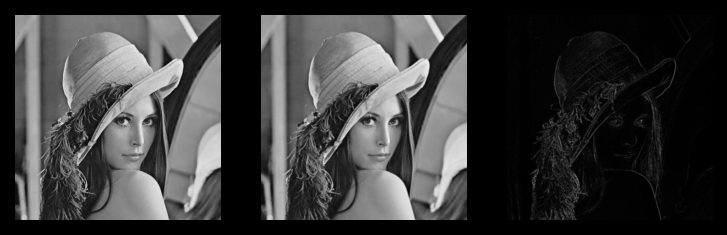

In [13]:
def mean_filter(img, n=3):
    nrows, ncols = img.shape[:2]
    if img.ndim == 3:
        img_new = np.zeros((nrows - n + 1, ncols - n + 1, img.shape[2]), dtype='uint8')
        for k in range(img.shape[2]):
            img_new[:, :, k] = mean_filter(img[:, :, k], n)
        return img_new

    img_new = np.zeros((nrows - n + 1, ncols - n + 1), dtype='uint8')
    for i in range(nrows - n + 1):
        box_sum = img[i:i + n, :n].sum(dtype='float32') / n**2
        img_new[i, 0] = round(box_sum)
        for j in range(1, ncols - n + 1):
            box_sum += (img[i:i+n, j+n-1].sum(dtype='float32') - img[i:i+n, j-1].sum()) / n**2
            img_new[i, j] = box_sum
    return img_new


img_gray_avg3 = mean_filter(img_gray, 3)
img_gray_avg5 = mean_filter(img_gray, 5)
diff = np.abs(img_gray_avg3.astype('int16')[1:-1, 1:-1] - img_gray_avg5).astype('uint8')
fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img_gray_avg3, cmap='gray')
axes[1].imshow(img_gray_avg5, cmap='gray')
axes[2].imshow(diff, cmap='gray')
for ax in axes:
    ax.set_axis_off()


#### Задача 9 (6 баллов) 
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапазоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции.

In [14]:
## your code here